In [1]:
### Module 0: Importing Libraries
import pandas as pd
import numpy as np
import pprint
import os 
from time import time 
from dotenv import load_dotenv
import json
import argparse
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from openai import OpenAI
import certifi

## Importing VE libraries
from utils import *
from dataset_utils import read_wikiqa_data
from prompt_helper import get_joint_prompt_helper, normalize_prediction
from dataset_utils import read_wikiqa_data, wiki_evaluation
# Override bad SSL_CERT_FILE if set
os.environ["SSL_CERT_FILE"] = certifi.where()


### Executing Consistency

In [2]:
from consistency import test_few_shot_manual_prediction, _parse_args

In [3]:
consistency_args = _parse_args()
consistency_args

Namespace(style='e-p', annotation='std', run_prediction=False, num_shot=5, train_slice=0, num_dev=100, dev_slice=0, show_result=False, model='gpt3.5', temperature=0.7, plot_consistency=False, engine='gpt-3.5-turbo-0125', run_length_test=False, helper=<prompt_helper.JointEandPPromptHelper object at 0x31e7902c0>)

In [4]:
args = consistency_args

In [5]:
print("Running prediction")
train_set = read_wikiqa_data(f"data/train_subset.json", manual_annotation_style=args.style)
train_set = train_set[args.train_slice:(args.train_slice + args.num_shot)]
print('len(train_set): ', len(train_set))
dev_set = read_wikiqa_data(f"data/dev_sampled.json")
dev_set = dev_set[args.dev_slice:(args.num_dev)]

prompt, _ = args.helper.prompt_for_joint_prediction(dev_set[0], train_set)
print('prompt: ')
print(prompt)

Running prediction
0 not found
len(train_set):  5
7 not found
prompt: 
Question: Which film was released earlier, Kistimaat or I'M Taraneh, 15?
A: First, film Kistimaat was released on 6 October 2014. Second, I'M Taraneh, 15 was released on 13 November 2002. The answer is I'M Taraneh, 15.

Question: What is the date of death of the composer of film Baalaraajana Kathe?
A: First, the composer of film Baalaraajana Kathe is S. Hanumantha Rao. Second, S. Hanumantha Rao died on 27 May 1980. The answer is 27 May 1980.

Question: Who is the spouse of the director of film Alive (1993 Film)?
A: First, the director of film Alive is Frank Marshall. Second, Frank Marshall's spouse is Kathleen Kennedy. The answer is Kathleen Kennedy.

Question: Who lived longer, Edward Frederick Sanderson or Forrest Towns?
A: First, Edward Frederick Sanderson died at age 81. Second, Forrest Towns died at age 77. The answer is Edward Frederick Sanderson.

Question: Which country the director of film Battle Circus (Fi

Running prediction
0 not found
len(train_set):  5
7 not found


Verifying: 100%|██████████| 10/10 [00:00<00:00, 32589.77it/s]

--------------0 EX False RAT False F1 0.00 CONS 0.60--------------
question:  Where was the performer of song Get A Life – Get Alive born?
0: First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England. | London, England
1: First, the performer of the song Get A Life - Get Alive is born in Jamaica. | Jamaica
2: First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England. | London, England
3: First, the performer of the song Get A Life - Get Alive is Bryan Adams. Second, Bryan Adams was born in Kingston, Ontario, Canada. | Kingston, Ontario, Canada
4: First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England. | London, England
PR ANS: London, England
PR RAT: First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England.
GT ANS: Vöcklab


/Users/jiteshsingla/Documents/MS Research Final Topic/Implementation/VE_implementation/consistency.py:247: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="consistency", hue="label", kind="kde", fill=True)


([{'response': ' First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England. The answer is London, England.',
   'id': '1ee47f380bde11eba7f7acde48001122',
   'consistency': 0.6,
   'rationale': 'First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England.',
   'answer': 'London, England',
   'original_answers': ['London, England',
    'Jamaica',
    'London, England',
    'Kingston, Ontario, Canada',
    'London, England'],
   'original_rationales': ['First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England.',
    'First, the performer of the song Get A Life - Get Alive is born in Jamaica.',
    'First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England.',
    'First, the performer of the song Get A Life - Get Alive is Bryan Ada

<Figure size 1000x500 with 0 Axes>

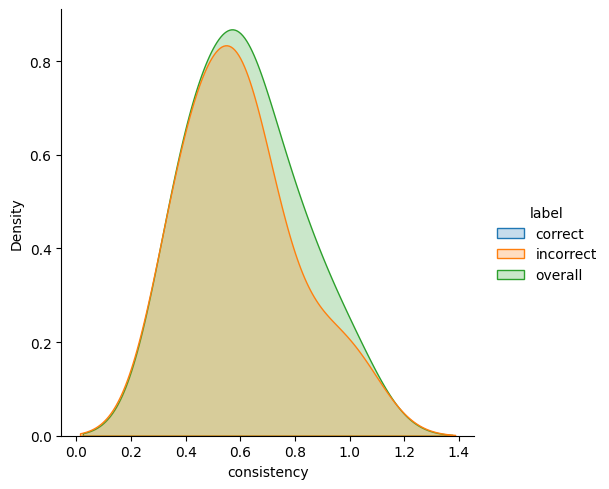

In [7]:
test_few_shot_manual_prediction(consistency_args)

### Executing Verifying Questions 

In [2]:
from verifying_questions import test_few_shot_manual_prediction as vq_test_few_shot_manual_pred, _parse_args as vq_parse_args

In [3]:
vq_args = vq_parse_args()
vq_args

Namespace(style='e-p', annotation='std', run_prediction=False, num_shot=5, train_slice=0, num_dev=10, dev_slice=0, show_result=False, model='gpt3', temperature=0.7, consistency_threshold=0.5, engine='gpt-3.5-turbo-0125', engine_name='gpt-3.5-turbo-0125', helper=<prompt_helper.JointEandPPromptHelper object at 0x321346ba0>)

In [4]:
vq_test_few_shot_manual_pred(vq_args)

Running prediction
0 not found
len(train_set):  5
7 not found
prompt: 
Write a question that validates the reason for an overall question.

Overall Question: What is the date of death of the composer of film Baalaraajana Kathe?
Reason: First, the composer of film Baalaraajana Kathe is S. Hanumantha Rao.
Question: Who is the composer of film Baalaraajana Kathe?

Overall Question: Who lived longer, Edward Frederick Sanderson or Forrest Towns?
Reason: First, Edward Frederick Sanderson died at age 81.
Question: How long did Edward Frederick Sanderson live for?

Overall Question: question
Reason: sentence
Question:
args.num_dev:  10


Verifying: 100%|██████████| 10/10 [00:00<00:00, 28906.30it/s]


running verifying question generation


Verifying:   0%|          | 0/10 [00:00<?, ?it/s]

0 0.6
1 0.6
2 0.6
3 0.4


Verifying:  40%|████      | 4/10 [00:01<00:02,  2.39it/s]

4 0.4


Verifying:  50%|█████     | 5/10 [00:02<00:02,  2.10it/s]

5 0.8
6 0.4


Verifying: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

7 1.0
8 0.6
9 0.8
--------------3 EX 0.4 CONS--------------
question:  Where did the director of film Temptation (1959 Film) die?
rationale_sentence 0: the director of film Temptation (1959 Film) is Ingmar Bergman. 
verifying_question 0: Where did Ingmar Bergman, the director of the film Temptation (1959 Film), die?
rationale_sentence 1: Ingmar Bergman died in Fårö, Sweden.
verifying_question 1: Where did Ingmar Bergman, the director of film Temptation (1959 Film), die?
--------------4 EX 0.4 CONS--------------
question:  Who is the uncle of John Kennedy, 2Nd Lord Kennedy?
rationale_sentence 0: John Kennedy, 2nd Lord Kennedy's uncle is David Kennedy, 1st Earl of Cassilis.
verifying_question 0: Who is David Kennedy, 1st Earl of Cassilis related to in terms of family?
--------------6 EX 0.4 CONS--------------
question:  Are the movies The Statement (Film) and A Self Made Hero, from the same country?
rationale_sentence 0: The Statement (Film) is a film from France. 
verifying_question 0: 

### Executing Relevant Context

In [8]:
from relevant_context import _parse_args as relevant_parse_args, test_few_shot_manual_prediction as relevant_context_test_few_shot_manual_prediction

In [3]:
relevant_context_args = relevant_parse_args()
relevant_context_args

Namespace(engine='gpt-3.5-turbo-0125', style='e-p', annotation='std', run_prediction=False, num_shot=5, train_slice=0, num_dev=10, dev_slice=0, topk=3, show_result=False, model='gpt3', temperature=0.7, consistency_threshold=0.5, training_set=False, no_claim=False, plot_numbers=False, check_inclusion=False, retrieval='wikipedia', drqa_path='misc/verifying_questions-default-pipeline.preds', google_path='misc/2wiki_google.pkl', engine_name='gpt-3.5-turbo-0125', helper=<prompt_helper.JointEandPPromptHelper object at 0x337c2ad20>)

In [4]:
relevant_context_test_few_shot_manual_prediction(relevant_context_args)

Running prediction
0 not found
len(train_set):  5
7 not found


Verifying: 100%|██████████| 10/10 [03:09<00:00, 18.92s/it]

includes_before:  0.16611294850498384
includes_after:  0.16611294850498384
--------------3 EX --------------
question:  Where did the director of film Temptation (1959 Film) die?
ground_truth_contexts: ['Temptation (also known as Temptation Island) is a 1959 French drama film co-written and directed by Edmond T. Gréville.', '20 June 1906 Nice – 26 May 1966']
rationale_sentence 0: the director of film Temptation (1959 Film) is Ingmar Bergman. 
verifying_question 0: Where did Ingmar Bergman, the director of the film Temptation (1959 Film), die?
relevant_contexts 0: ['Filmography\nNarrative\nFilm\nTelevision\nDocumentary\nSee also\nList of stage productions directed by Ingmar Bergman\n\nReferences\nGeneral\n"Ingmar Bergman: Films".', 'Ingmar Bergman was a Swedish screenwriter and film director.', 'Temptation is a 1946 American film noir thriller film directed by Irving Pichel and starring Merle Oberon, George Brent, Charles Korvin and Paul Lukas.']
rationale_sentence 1: Ingmar Bergman die

In [5]:
relevant_context = [{"id": "28942dc20bdd11eba7f7acde48001122", "context": [["Filmography\nNarrative\nFilm\nTelevision\nDocumentary\nSee also\nList of stage productions directed by Ingmar Bergman\n\nReferences\nGeneral\n\"Ingmar Bergman: Films\".", "Ingmar Bergman was a Swedish screenwriter and film director.", "Temptation is a 1946 American film noir thriller film directed by Irving Pichel and starring Merle Oberon, George Brent, Charles Korvin and Paul Lukas."], ["Ingmar Bergman was a Swedish screenwriter and film director.", "Erik Henrik Fredrik Bergman (22 October 1886 \u2013 26 April 1970) was a Swedish parish minister of the Lutheran Church and the father of diplomat Dag Bergman, novelist Margareta Bergman, and film director Ingmar Bergman.", "Ernst Ingmar Bergman (14 July 1918 \u2013 30 July 2007) was a Swedish film and theatre director and screenwriter."]]}, {"id": "6a8a71280bb011ebab90acde48001122", "context": [["At least one Kennedy family member was serving in federal elective office in every year from 1947, when P. J. Kennedy's grandson John F. Kennedy became a member of Congress from Massachusetts, until 2011, when Patrick J. Kennedy II (John's nephew) retired as a member of the U.S.", "1463\u20131513), Scottish peer\nDavid Kennedy, 10th Earl of Cassilis (bef.", "David Kennedy may refer to:\n\nArts and entertainment\nDavid Kennedy (actor) (born 1964), British actor\nDavid Kennedy (born 1988), British musician performing as Pearson Sound\nDavid Kennedy (film producer) (1941\u20132015), American film producer\nDavid Kennedy (singer) (1825\u20131886), Scottish minister and tenor\nDavid J. Kennedy (painter) (1816/17\u20131898), Philadelphia painter\nDavid Michael Kennedy (born 1950), American fine art photographer\n\nPoliticians and government\nDavid Kennedy (Australian politician) (born 1940), politician and member of the Australian House of Representatives\nDavid B. Kennedy (1933\u20132019), member of the Wyoming House of Representatives\nDavid Kennedy (economist) (born 1969), British civil servant, formerly chief executive of the Committee on Climate Change\nDavid J. Kennedy (politician) (1907\u20131995), Maine politician and pharmacist\nDavid M. Kennedy (politician) (1905\u20131996), American businessman, economist and United States Secretary of the Treasury\nDavid T. Kennedy (1934\u20132014), American politician, mayor of Miami\n\nScience and academics\nDavid Kennedy (astronomer) (1864\u20131936), first New Zealand born Marist priest, noted astronomer and educator\nDavid Kennedy (jurist) (born 1954), American legal academic, vice president of international affairs at Brown University\nDavid L. Kennedy (born 1948), Scottish Roman archaeologist and historian at the University of Western Australia and the University of Oxford\nDavid M. Kennedy (historian) (born 1941), Pulitzer Prize-winning historian and professor at Stanford\nDavid M. Kennedy (criminologist) (born 1958), American criminologist, author of Don't Shoot\n\nSports\nDavid Kennedy (hurler) (born 1976), Irish hurler\nDavid Kennedy (racing driver) (born 1953), Irish racing driver\nDave Kennedy (footballer) (born 1949), English footballer\nDavid Kennedy (cricketer) (1890\u20131916), Scottish cricketer and soldier\n\nOther\nDavid Kennedy (advertising) (1939\u20132021), American advertising executive, co-founder of the Wieden+Kennedy agency\nDavid Kennedy, 1st Earl of Cassilis (aft."]]}, {"id": "9c4a7a4f090c11ebbdadac1f6bf848b6", "context": [["A Self-Made Hero (French: Un h\u00e9ros tr\u00e8s discret) is a 1996 French film directed by Jacques Audiard.", "Synopsis\nThe film is presented in the style of a historical documentary, with an elderly Dehousse narrating the events of his life, interspersed with interviews with other characters and historians.", "It is a satire of the action genre and associated clich\u00e9s, containing several parodies of action films in the form of films within the film."], ["A Self-Made Hero (French: Un h\u00e9ros tr\u00e8s discret) is a 1996 French film directed by Jacques Audiard.", "A hero (feminine: heroine) is a real person or fictional character who, in the face of danger, combats adversity through feats of ingenuity, courage, or strength.", "Post-classical and modern heroes, on the other hand, perform great deeds or selfless acts for the common good instead of the classical goal of wealth, pride, and fame."]]}]

In [6]:
len(relevant_context)

3

In [13]:
relevant_context[0]['context']

[['Filmography\nNarrative\nFilm\nTelevision\nDocumentary\nSee also\nList of stage productions directed by Ingmar Bergman\n\nReferences\nGeneral\n"Ingmar Bergman: Films".',
  'Ingmar Bergman was a Swedish screenwriter and film director.',
  'Temptation is a 1946 American film noir thriller film directed by Irving Pichel and starring Merle Oberon, George Brent, Charles Korvin and Paul Lukas.'],
 ['Ingmar Bergman was a Swedish screenwriter and film director.',
  'Erik Henrik Fredrik Bergman (22 October 1886 – 26 April 1970) was a Swedish parish minister of the Lutheran Church and the father of diplomat Dag Bergman, novelist Margareta Bergman, and film director Ingmar Bergman.',
  'Ernst Ingmar Bergman (14 July 1918 – 30 July 2007) was a Swedish film and theatre director and screenwriter.']]

### Generating Verifying Answers

In [2]:
from verifying_answers import _parse_args as verifying_answers_parse_args, test_few_shot_manual_prediction as verifying_answers_few_shot_manual_predicton

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
verifying_answers_args = verifying_answers_parse_args()
verifying_answers_args

Namespace(engine='gpt-3.5-turbo-0125', style='e-p', annotation='std', run_prediction=False, num_distractor=2, num_shot=5, train_slice=0, num_dev=10, dev_slice=0, topk=2, show_result=False, model='gpt3', temperature=0.7, consistency_threshold=0.5, retrieval='wikipedia', helper=<prompt_helper.JointEandPPromptHelper object at 0x33dd1ffe0>, engine_name='gpt-3.5-turbo-0125')

In [4]:
verifying_answers_few_shot_manual_predicton(verifying_answers_args)

Running prediction
0 not found
len(train_set):  5
7 not found
prompt:
The film was released in 1984 by Essex Films. Kistimaat is a 2014 Bangladeshi action film directed by Ashiqur Rahman and produced by Tiger Media Limited and The Abhi Pictures. I'm Taraneh, 15 is a 2002 Iranian film directed by Rasul Sadrameli. The film was released on May 4, 2001.
Question: When was the film Kistimaat released?
Answer: The film Kistimaat was released in 2014.

Dwaram Venkataswami Naidu and also a lyricist. The film has musical score by S. Hanumantha Rao. Rao died 27 May 1980. Rao married Raja Mani with whom he had three daughters and one son.
Question: Who is the composer of film Baalaraajana Kathe?
Answer: The composer of film Baalaraajana Kathe is S. Hanumantha Rao.

Adib Kheir was a leading Syrian nationalist of the 1920s. Filmed on location in the Purcell Mountains in British Columbia, the film was directed by Frank Marshall, written by John Patrick Shanley, and narrated by John Malkovich. Frank 

Verifying: 100%|██████████| 10/10 [00:00<00:00, 45491.37it/s]


running verifying answer generation


Verifying: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]

saved to:  misc/verifying_answers_tr0-5_dv0-10_wikipedia_thres0.5.json
--------------28942dc20bdd11eba7f7acde48001122 EX 0.4 CONS--------------
question:  Where did the director of film Temptation (1959 Film) die?
rationale_sentence 0: the director of film Temptation (1959 Film) is Ingmar Bergman. 
verifying_question 0: Where did Ingmar Bergman, the director of the film Temptation (1959 Film), die?
contexts 0: ['Filmography\nNarrative\nFilm\nTelevision\nDocumentary\nSee also\nList of stage productions directed by Ingmar Bergman\n\nReferences\nGeneral\n"Ingmar Bergman: Films".', 'Ingmar Bergman was a Swedish screenwriter and film director.', 'Temptation is a 1946 American film noir thriller film directed by Irving Pichel and starring Merle Oberon, George Brent, Charles Korvin and Paul Lukas.']
verifying_answers 0: Ingmar Bergman, the director of the film Temptation (1959 Film), died in Sweden.
rationale_sentence 1: Ingmar Bergman died in Fårö, Sweden.
verifying_question 1: Where did Ing

### Answering Again

In [2]:
from answer_again import _parse_args as answer_again_parse_args, test_few_shot_manual_prediction as answer_again_test_few_shot_manual_prediction

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
answer_again_args =answer_again_parse_args()
answer_again_args

Namespace(engine='gpt-3.5-turbo-0125', style='e-p', annotation='std', run_prediction=False, run_length_test=False, num_shot=5, train_slice=0, num_dev=10, dev_slice=0, topk=1, show_result=False, model='gpt3', temperature=0.7, consistency_threshold=0.5, retrieval='wikipedia', engine_name='gpt-3.5-turbo-0125', helper=<prompt_helper.JointEandPPromptHelper object at 0x346024950>)

In [4]:
answer_again_test_few_shot_manual_prediction(answer_again_args)

Running prediction
0 not found
len(train_set):  5
7 not found
prompt:  Question: Which film was released earlier, Kistimaat or I'M Taraneh, 15?
A: First, film Kistimaat was released on 6 October 2014. Second, I'M Taraneh, 15 was released on 13 November 2002. The answer is I'M Taraneh, 15.

Question: What is the date of death of the composer of film Baalaraajana Kathe?
A: First, the composer of film Baalaraajana Kathe is S. Hanumantha Rao. Second, S. Hanumantha Rao died on 27 May 1980. The answer is 27 May 1980.

Question: Who is the spouse of the director of film Alive (1993 Film)?
A: First, the director of film Alive is Frank Marshall. Second, Frank Marshall's spouse is Kathleen Kennedy. The answer is Kathleen Kennedy.

Question: Who lived longer, Edward Frederick Sanderson or Forrest Towns?
A: First, Edward Frederick Sanderson died at age 81. Second, Forrest Towns died at age 77. The answer is Edward Frederick Sanderson.

Question: Which country the director of film Battle Circus (Fi